In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from ModelTrainer import RegressionModelTrainer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
data = pd.read_csv("./data/Question4.csv")
data = data.drop(columns=['id'])

In [4]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [6]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
correlation_matrix = data.select_dtypes(exclude=["object"]).corr()

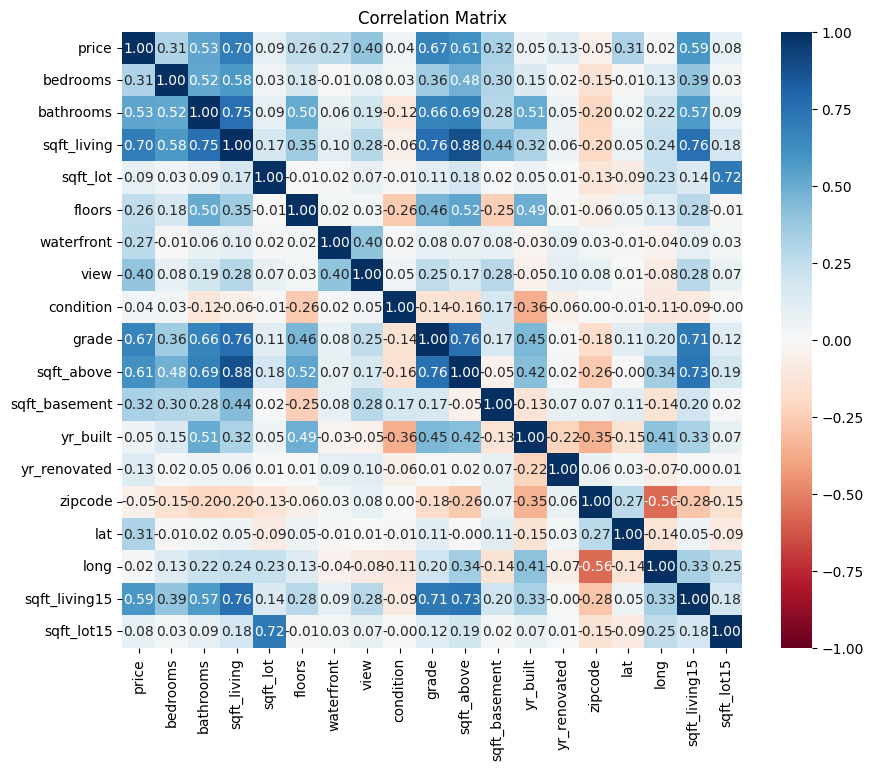

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

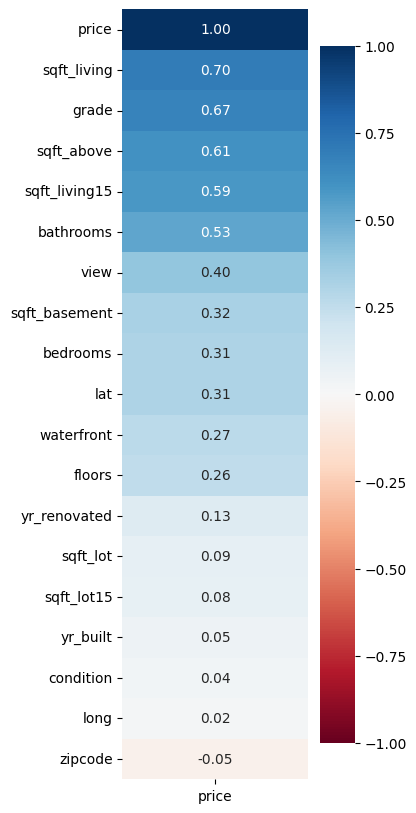

In [21]:
price_correlations = correlation_matrix[["price"]].sort_values(by='price', ascending=False)
plt.figure(figsize=(3, 10))
cmap = sns.diverging_palette(220, 220, as_cmap=True)
sns.heatmap(price_correlations, annot=True, cmap='RdBu', fmt='.2f',  vmin=-1, vmax=1)
plt.show()


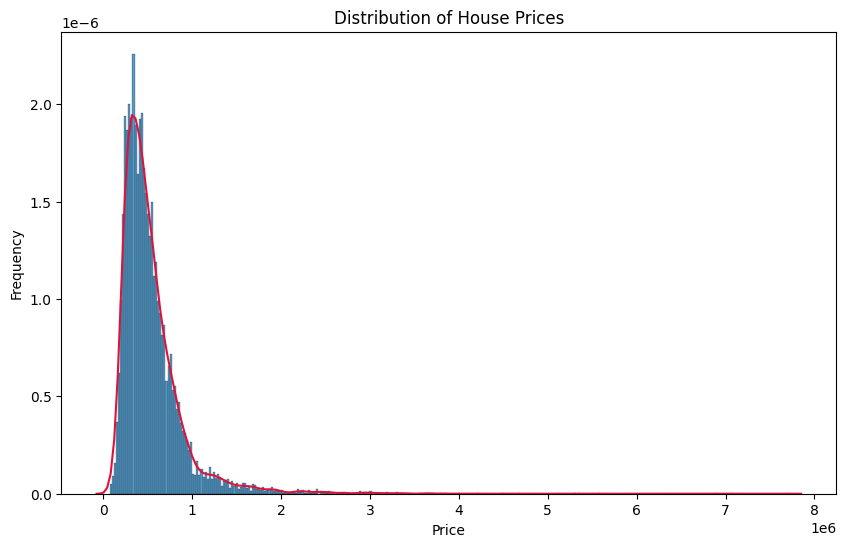

In [48]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='price', kde=False, stat="density")
sns.kdeplot(data=data, x='price', color='crimson', ax=ax)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

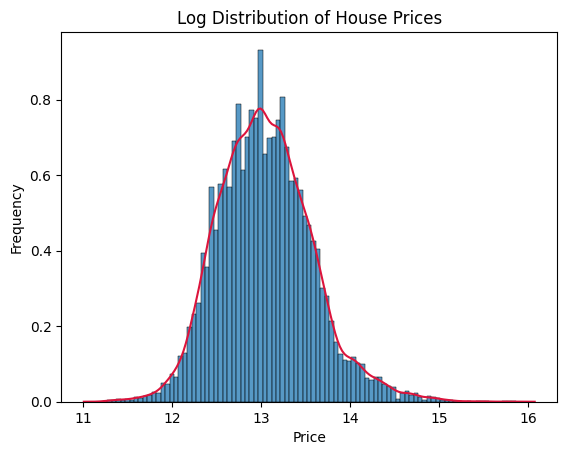

In [56]:
target_normalized = np.log(data['price'])
ax = sns.histplot(target_normalized, kde=False, stat='density')
sns.kdeplot(data=target_normalized, color='crimson', ax=ax)
plt.title("Log Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

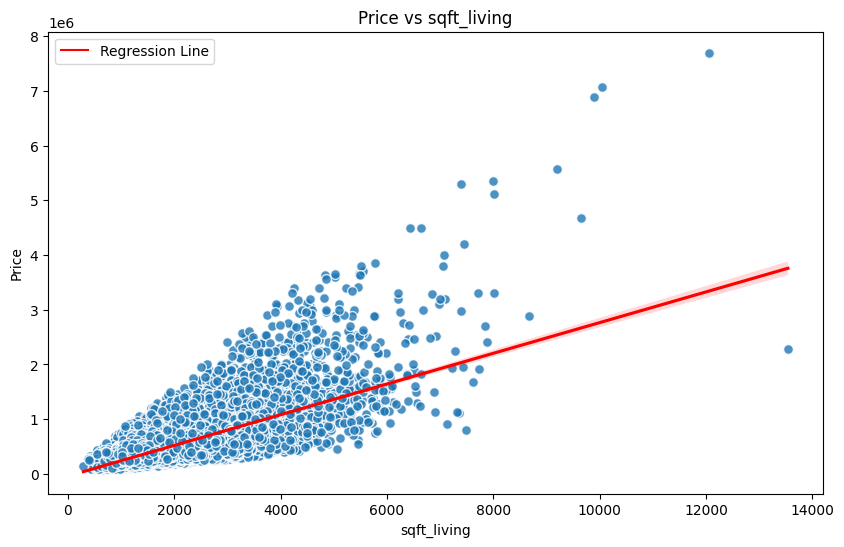

In [82]:
for i in range(1, 2):
    top_feature = price_correlations.index[i] 
    plt.figure(figsize=(10, 6))
    sns.regplot(x=data[top_feature], y=data['price'], scatter_kws={'s': 50, 'edgecolor': 'white'}, line_kws={'color': 'red'})
    plt.title(f"Price vs {top_feature}")
    plt.xlabel(top_feature)
    plt.ylabel("Price")
    plt.plot([], [], 'r-', label='Regression Line')
    plt.legend()
    plt.show()


In [83]:
data['date'] = pd.to_datetime(data['date'], errors='coerce', format='%Y%m%dT%H%M%S')

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

data = data.drop(columns=['date'])
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [84]:
X = data.drop('price', axis=1)
Y = data['price']
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.25, random_state=13)

In [85]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_validation_scaled = scaler.transform(X_validation) 
y_train_df = pd.DataFrame(y_train, columns=['price']) 
y_validation_df = pd.DataFrame(y_validation, columns=['price'])

In [86]:
class HousePriceMLP(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes):
        super(HousePriceMLP, self).__init__()
        layers = []
        previous_size = input_size
        for hidden_size in hidden_layer_sizes:
            layers.append(nn.Linear(previous_size, hidden_size))
            layers.append(nn.ReLU())
            previous_size = hidden_size
        layers.append(nn.Linear(previous_size, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x).view(-1, 1)

In [87]:
X_train = torch.tensor(X_train_scaled, dtype=torch.float32) 
X_validation = torch.tensor(X_validation_scaled, dtype=torch.float32) 
y_train = torch.tensor(y_train_df.values, dtype=torch.float32).view(-1, 1)
y_validation = torch.tensor(y_validation_df.values, dtype=torch.float32).view(-1, 1)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_validation, y_validation)

In [88]:
def hyperparameter_tuning(train_dataset, test_dataset, input_size, learning_rates, hidden_layer_configs, lambdas):
    results = []
    for learning_rate in learning_rates:
        for hidden_layer_config in hidden_layer_configs:
            for lam in lambdas:
                model = HousePriceMLP(input_size, hidden_layer_config).to(device)
                model_trainer = RegressionModelTrainer(
                    model=model,
                    train_dataset=train_dataset,
                    test_dataset=test_dataset,
                    device=device,
                    learning_rate=learning_rate,
                    num_epochs=40
                )
                optimizer = optim.Adam(model_trainer.model.parameters(), lr=learning_rate, weight_decay=lam)
                _, _ = model_trainer.train_with_optimizer(optimizer)
                
                mae, rmse, _ = model_trainer.evaluate()
                results.append({
                    'learning_rate': learning_rate,
                    'hidden_layers': hidden_layer_config,
                    'lambda': lam,
                    'MAE': mae,
                    'RMSE': rmse
                })
                print(f"Learning Rate: {learning_rate}, Hidden Layers: {hidden_layer_config}, Lambda: {lam}")
    
    results_df = pd.DataFrame(results)
    return results_df

In [89]:
learning_rates = [0.01, 0.05]
lambdas = [1e-4, 1e-3]
hidden_layer_configs = [[64], [128], [256]]

In [90]:
results_df = hyperparameter_tuning(train_dataset, test_dataset, input_size=X_train.shape[1],
                                    learning_rates=learning_rates, hidden_layer_configs=hidden_layer_configs, lambdas=lambdas)

Epoch [1/40], Train Loss: 417685333353.2966, Train MAE: 534419.4375, Validation Loss: 416921116932.7372, Validation MAE: 525437.6875
Epoch [2/40], Train Loss: 382874808611.3621, Train MAE: 502757.6562, Validation Loss: 367380940583.2243, Validation MAE: 479307.2188
Epoch [3/40], Train Loss: 325036920278.8416, Train MAE: 445579.6250, Validation Loss: 302670601506.2975, Validation MAE: 411784.3750
Epoch [4/40], Train Loss: 259986654250.3903, Train MAE: 371621.7812, Validation Loss: 237890589475.4345, Validation MAE: 332658.5625
Epoch [5/40], Train Loss: 200361735513.3765, Train MAE: 291957.0625, Validation Loss: 183425887149.3827, Validation MAE: 257047.2656
Epoch [6/40], Train Loss: 154204856541.8698, Train MAE: 228614.7188, Validation Loss: 144743051776.3790, Validation MAE: 210734.4219
Epoch [7/40], Train Loss: 124351251109.8654, Train MAE: 197495.4375, Validation Loss: 122364799947.7010, Validation MAE: 193592.0625
Epoch [8/40], Train Loss: 108754721399.4951, Train MAE: 189944.7656, 

In [ ]:
results_df.sort_values(by='RMSE')

    learning_rate hidden_layers  lambda            MAE           RMSE
10           0.05         [256]  0.0001  111814.226562  178766.000000
11           0.05         [256]  0.0010  112342.812500  179283.453125
9            0.05         [128]  0.0010  118602.015625  191666.312500
8            0.05         [128]  0.0001  117992.625000  193139.328125
7            0.05          [64]  0.0010  121484.734375  201323.171875
6            0.05          [64]  0.0001  127657.406250  205865.796875
5            0.01         [256]  0.0010  129408.851562  214294.890625
4            0.01         [256]  0.0001  130313.687500  214717.875000
2            0.01         [128]  0.0001  133176.140625  225272.500000
3            0.01         [128]  0.0010  133017.375000  225586.843750
0            0.01          [64]  0.0001  145287.828125  245121.265625
1            0.01          [64]  0.0010  147344.218750  247967.359375


In [103]:
hidden_layer_config = [256]
learning_rate = 0.05
lam = 0.0001

Epoch [1/150], Train Loss: 228543340740.3472, Train MAE: 327156.7188, Validation Loss: 106512486336.3316, Validation MAE: 197397.8438
Epoch [2/150], Train Loss: 94242291676.1167, Train MAE: 193974.2344, Validation Loss: 95007290856.8823, Validation MAE: 193469.3750
Epoch [3/150], Train Loss: 83524299584.7699, Train MAE: 182295.0000, Validation Loss: 82584290474.5403, Validation MAE: 174387.1562
Epoch [4/150], Train Loss: 72319423299.6760, Train MAE: 166088.1094, Validation Loss: 70416125703.3901, Validation MAE: 159047.3125
Epoch [5/150], Train Loss: 62084536676.1794, Train MAE: 149876.3281, Validation Loss: 60676818451.3279, Validation MAE: 150860.9531
Epoch [6/150], Train Loss: 54641879536.8065, Train MAE: 138515.7656, Validation Loss: 53782499555.3871, Validation MAE: 137847.0000
Epoch [7/150], Train Loss: 50220213721.4950, Train MAE: 132290.6250, Validation Loss: 50171443789.6906, Validation MAE: 131921.5000
Epoch [8/150], Train Loss: 47612410206.3673, Train MAE: 129156.5000, Valid

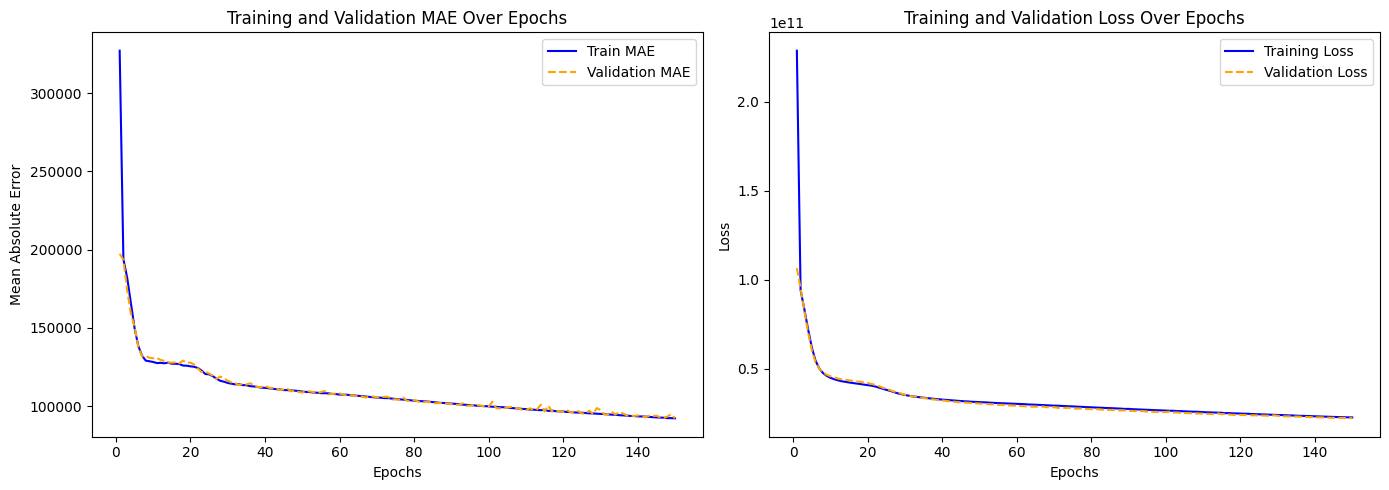

MAE: 92266.6797, RMSE: 148871.6250



In [104]:
model = HousePriceMLP(X_train.shape[1], hidden_layer_config).to(device)
model_trainer = RegressionModelTrainer(
    model=model,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    device=device,
    learning_rate=learning_rate,
    num_epochs=150
)
optimizer = optim.Adam(model_trainer.model.parameters(), lr=learning_rate, weight_decay=lam)
train_losses, val_losses = model_trainer.train_with_optimizer(optimizer)
                
model_trainer.plot_metrics()
mae, rmse, _ = model_trainer.evaluate()
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}\n")

In [100]:
learning_rates = [0.01, 0.05]
lambdas = [1e-4, 1e-3]
hidden_layer_configs = [[64,128], [128,256]]

In [101]:
results_df = hyperparameter_tuning(train_dataset, test_dataset, input_size=X_train.shape[1],
                                    learning_rates=learning_rates, hidden_layer_configs=hidden_layer_configs, lambdas=lambdas)

Epoch [1/40], Train Loss: 170204413618.6898, Train MAE: 275286.6250, Validation Loss: 91476759664.9356, Validation MAE: 185729.8438
Epoch [2/40], Train Loss: 73012821546.4850, Train MAE: 167326.7812, Validation Loss: 62986170625.7054, Validation MAE: 148441.4375
Epoch [3/40], Train Loss: 53013122049.8321, Train MAE: 136768.2344, Validation Loss: 49645284472.5152, Validation MAE: 133222.2812
Epoch [4/40], Train Loss: 46349284852.2811, Train MAE: 129719.4922, Validation Loss: 45905005924.9978, Validation MAE: 130898.5234
Epoch [5/40], Train Loss: 43730435842.1637, Train MAE: 127886.1406, Validation Loss: 43851887750.1584, Validation MAE: 127096.2344
Epoch [6/40], Train Loss: 41861573460.9859, Train MAE: 125373.7656, Validation Loss: 41912627196.9682, Validation MAE: 126063.5859
Epoch [7/40], Train Loss: 40184240291.5595, Train MAE: 123633.1641, Validation Loss: 40057781736.8823, Validation MAE: 124636.7109
Epoch [8/40], Train Loss: 38381517085.8659, Train MAE: 120972.2344, Validation Los

In [102]:
results_df.sort_values(by='RMSE')

,learning_rate,hidden_layers,lambda,MAE,RMSE
5,0.05,"[64, 128]",0.0010,96449.281250,155776.984375
3,0.01,"[128, 256]",0.0010,100428.718750,161249.468750
1,0.01,"[64, 128]",0.0010,103326.125000,162225.859375
7,0.05,"[128, 256]",0.0010,108826.312500,162262.265625
0,0.01,"[64, 128]",0.0001,103068.304688,162676.062500
4,0.05,"[64, 128]",0.0001,99165.156250,163016.250000
6,0.05,"[128, 256]",0.0001,98385.710938,164304.625000
2,0.01,"[128, 256]",0.0001,112113.945312,168995.890625


In [27]:
hidden_layer_config = [64, 128]
learning_rate = 0.05
lam = 0.0010

Epoch [1/150], Train Loss: 93433415652.5822, Train MAE: 187266.1875, Validation Loss: 47550435761.5514, Validation MAE: 133669.6406
Epoch [2/150], Train Loss: 41666009591.5030, Train MAE: 125322.5859, Validation Loss: 38001393451.7720, Validation MAE: 119787.3672
Epoch [3/150], Train Loss: 36305235487.2399, Train MAE: 118228.5234, Validation Loss: 33242581971.2805, Validation MAE: 115827.9688
Epoch [4/150], Train Loss: 34328591307.1227, Train MAE: 115810.3984, Validation Loss: 35230752589.1221, Validation MAE: 113247.9531
Epoch [5/150], Train Loss: 32331014012.1542, Train MAE: 111861.2266, Validation Loss: 30514510383.3723, Validation MAE: 110727.0312
Epoch [6/150], Train Loss: 31790831478.3106, Train MAE: 111385.0938, Validation Loss: 29581117899.3220, Validation MAE: 112532.2734
Epoch [7/150], Train Loss: 30759892059.9193, Train MAE: 109431.3516, Validation Loss: 30148122965.0807, Validation MAE: 115140.9375
Epoch [8/150], Train Loss: 30200342097.2112, Train MAE: 108504.8516, Validat

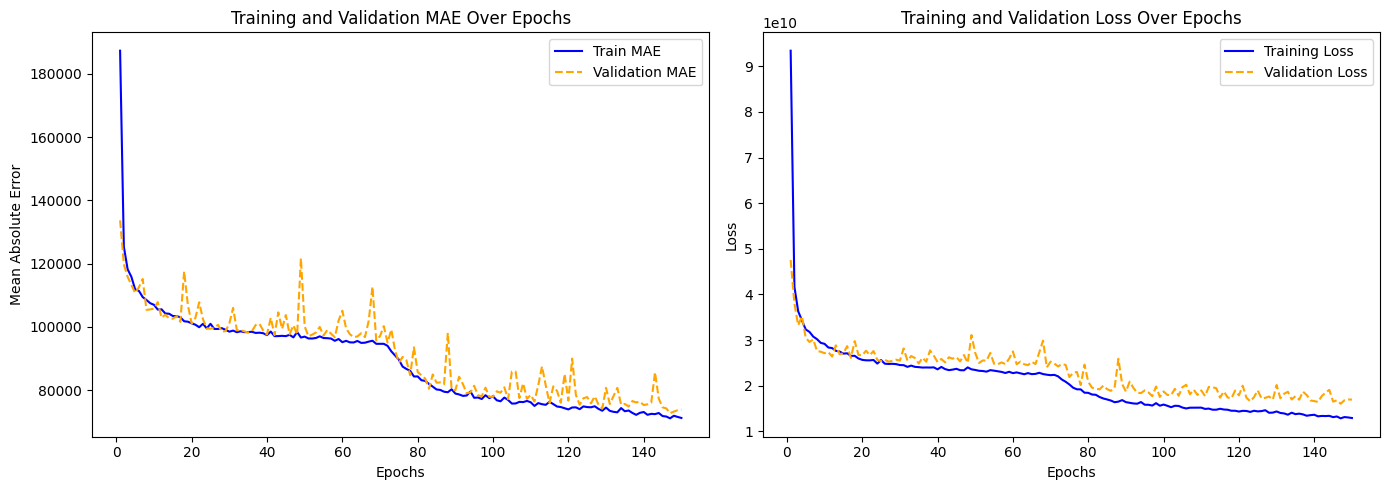

MAE: 73827.1875, RMSE: 130230.2969



In [29]:
model = HousePriceMLP(X_train.shape[1], hidden_layer_config).to(device)
model_trainer = RegressionModelTrainer(
    model=model,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    device=device,
    learning_rate=learning_rate,
    num_epochs=150
)
optimizer = optim.Adam(model_trainer.model.parameters(), lr=learning_rate, weight_decay=lam)
train_losses, val_losses = model_trainer.train_with_optimizer(optimizer)
                
model_trainer.plot_metrics()
mae, rmse, _ = model_trainer.evaluate()
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}\n")

In [115]:
num_samples = 5
random_indices = torch.randperm(X_validation.size(0))[:num_samples]
X_validation_samples = X_validation[random_indices]
y_validation_samples = y_validation[random_indices]

X_validation_samples = X_validation_samples.to(device)
y_validation_samples = y_validation_samples.to(device)

model.eval()
with torch.no_grad():
    preds = model(X_validation_samples)

for i in range(num_samples):
    print(f'For sample {random_indices[i]+1}: Prediction = {preds[i].item()}, Actual = {y_validation_samples[i].item()}')

For sample 1799: Prediction = 773610.9375, Actual = 788000.0
For sample 4166: Prediction = 369904.46875, Actual = 295000.0
For sample 3936: Prediction = 354933.625, Actual = 375000.0
For sample 4266: Prediction = 419953.09375, Actual = 420000.0
For sample 4575: Prediction = 614563.0625, Actual = 588000.0
